# Proyecto Mongo, donde analizare en donde podría poner mi compañía.

In [5]:
import pandas as pd
import numpy as np
import re
import folium
import pymongo
import seaborn as sns
import matplotlib.pyplot as plt
from pymongo import MongoClient
client=MongoClient()
db=client.companies

In [8]:
client = pymongo.MongoClient()
client #checando que estamos conectados a mi database

MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True)

In [9]:
database = client.companies

In [10]:
colec = database.companies

In [24]:
#Trabajemos en las categorias que me ayudaran a decidir en donde ubicare mi compañia
work_on_category = list(colec.find({},{"_id":0, "name":1,"category_code":1, "description":1, "deadpooled_year":1, "number_of_employees":1, "founded_year" :1, "products":1, "acquisition":1}))                                                                    
                                       

In [25]:
category = pd.DataFrame(work_on_category)

In [26]:
category

,name,category_code,number_of_employees,founded_year,deadpooled_year,description,products,acquisition
0,Wetpaint,web,47.0,2005.0,1.0,Technology Platform Company,"[{'name': 'Wikison Wetpaint', 'permalink': 'we...","{'price_amount': 30000000, 'price_currency_cod..."
1,AdventNet,enterprise,600.0,1996.0,2.0,Server Management Software,[],None
2,Zoho,software,1600.0,2005.0,3.0,Online Business Apps Suite,"[{'name': 'Zoho Office Suite', 'permalink': 'z...",None
3,Digg,news,60.0,2004.0,NaN,user driven social content website,"[{'name': 'Digg', 'permalink': 'digg'}]","{'price_amount': 500000, 'price_currency_code'..."
4,Facebook,social,5299.0,2004.0,NaN,Social network,"[{'name': 'Facebook Platform', 'permalink': 'f...",None
...,...,...,...,...,...,...,...,...
18796,Adhunk,advertising,3.0,2009.0,NaN,Online Admanager,"[{'name': 'Advertisieng', 'permalink': 'advert...",None
18797,AfterLogic,software,NaN,2002.0,NaN,.NET Email Components and Webmail,"[{'name': 'AfterLogic WebMail Pro', 'permalin...",None
18798,goBookmaker,web,NaN,NaN,NaN,Create your own sportsbook,[],None
18799,EnteGreat Solutions,software,NaN,NaN,NaN,,[],None


In [27]:
category["founded_year"].fillna(0, inplace = True)
category["founded_year"] = category["founded_year"].astype(int)
category["deadpooled_year"].fillna(0, inplace = True)
category["deadpooled_year"] = category["deadpooled_year"].astype(int)

category

,name,category_code,number_of_employees,founded_year,deadpooled_year,description,products,acquisition
0,Wetpaint,web,47.0,2005,1,Technology Platform Company,"[{'name': 'Wikison Wetpaint', 'permalink': 'we...","{'price_amount': 30000000, 'price_currency_cod..."
1,AdventNet,enterprise,600.0,1996,2,Server Management Software,[],None
2,Zoho,software,1600.0,2005,3,Online Business Apps Suite,"[{'name': 'Zoho Office Suite', 'permalink': 'z...",None
3,Digg,news,60.0,2004,0,user driven social content website,"[{'name': 'Digg', 'permalink': 'digg'}]","{'price_amount': 500000, 'price_currency_code'..."
4,Facebook,social,5299.0,2004,0,Social network,"[{'name': 'Facebook Platform', 'permalink': 'f...",None
...,...,...,...,...,...,...,...,...
18796,Adhunk,advertising,3.0,2009,0,Online Admanager,"[{'name': 'Advertisieng', 'permalink': 'advert...",None
18797,AfterLogic,software,NaN,2002,0,.NET Email Components and Webmail,"[{'name': 'AfterLogic WebMail Pro', 'permalin...",None
18798,goBookmaker,web,NaN,0,0,Create your own sportsbook,[],None
18799,EnteGreat Solutions,software,NaN,0,0,,[],None


In [28]:
status = []
for i in range(len(category)):
    if category["deadpooled_year"][i] == 0:
        status.append("Active")
    else:
        status.append("Dead")

category["status"] = (status)

In [29]:
category

,name,category_code,number_of_employees,founded_year,deadpooled_year,description,products,acquisition,status
0,Wetpaint,web,47.0,2005,1,Technology Platform Company,"[{'name': 'Wikison Wetpaint', 'permalink': 'we...","{'price_amount': 30000000, 'price_currency_cod...",Dead
1,AdventNet,enterprise,600.0,1996,2,Server Management Software,[],None,Dead
2,Zoho,software,1600.0,2005,3,Online Business Apps Suite,"[{'name': 'Zoho Office Suite', 'permalink': 'z...",None,Dead
3,Digg,news,60.0,2004,0,user driven social content website,"[{'name': 'Digg', 'permalink': 'digg'}]","{'price_amount': 500000, 'price_currency_code'...",Active
4,Facebook,social,5299.0,2004,0,Social network,"[{'name': 'Facebook Platform', 'permalink': 'f...",None,Active
...,...,...,...,...,...,...,...,...,...
18796,Adhunk,advertising,3.0,2009,0,Online Admanager,"[{'name': 'Advertisieng', 'permalink': 'advert...",None,Active
18797,AfterLogic,software,NaN,2002,0,.NET Email Components and Webmail,"[{'name': 'AfterLogic WebMail Pro', 'permalin...",None,Active
18798,goBookmaker,web,NaN,0,0,Create your own sportsbook,[],None,Active
18799,EnteGreat Solutions,software,NaN,0,0,,[],None,Active


In [37]:
comparison = pd.crosstab(category["category_code"],category["status"])
comparison

status,Active,Dead
category_code,,
advertising,892,36
analytics,66,0
automotive,8,1
biotech,355,18
cleantech,281,24
consulting,630,7
design,4,0
ecommerce,646,42
education,36,0


In [39]:
active_percentage = []
total_category = []
for i  in range(len(comparison)): 
    total_category.append(comparison["Dead"][i]+comparison["Active"][i])
comparison["Total"] = total_category

In [40]:
for i  in range(len(comparison)):
    if comparison["Dead"][i] == 0:
        active_percentage.append(100)
    else:
        active_percentage.append((((comparison["Total"][i]-comparison["Dead"][i])*100)/(comparison["Total"][i])))

In [41]:
comparison["Active percentage"] = active_percentage
comparison.sort_values("Active percentage", ascending = False, inplace = True)
comparison

status,Active,Dead,Total,Active percentage
category_code,,,,
messaging,30,0,30,100.000000
news,48,0,48,100.000000
nonprofit,4,0,4,100.000000
analytics,66,0,66,100.000000
manufacturing,19,0,19,100.000000
local,1,0,1,100.000000
photo_video,23,0,23,100.000000
hospitality,8,0,8,100.000000
health,23,0,23,100.000000


In [45]:
selection = comparison[comparison["Total"] >= 100]
final_selec = selection.drop("null", axis = 0)
final_selec

status,Active,Dead,Total,Active percentage
category_code,,,,
consulting,630,7,637,98.901099
enterprise,719,23,742,96.900270
other,953,33,986,96.653144
software,2634,102,2736,96.271930
security,150,6,156,96.153846
advertising,892,36,928,96.120690
search,375,19,394,95.177665
biotech,355,18,373,95.174263
public_relations,506,27,533,94.934334


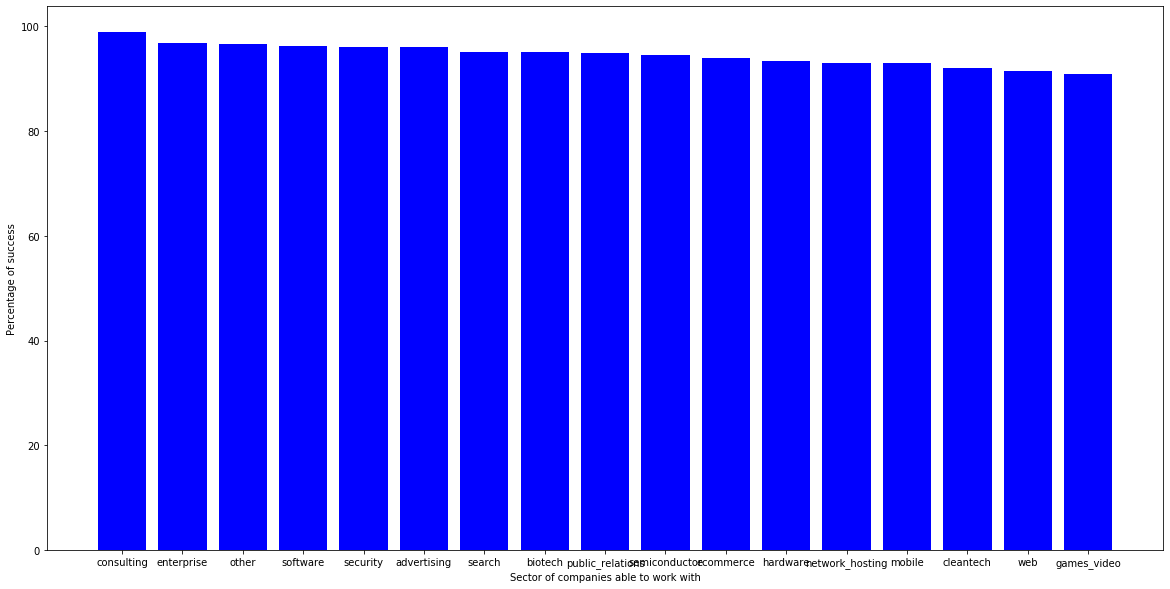

In [53]:
plt.figure(figsize =(20,10))
plt.bar(final_selec.index,final_selec["Active percentage"], linewidth = 4.0, color = 'b')
plt.xlabel("Sector of companies able to work with")
plt.ylabel("Percentage of success")
plt.show();

# Trabajare con la categoria Bio-Tech, es de mi interés.

In [55]:
select_category = list(colec.find({"category_code":"biotech"},{"_id":0, "name":1, "tag_list":1,"founded_year":1, "deadpooled_year":1}))

In [56]:
select_category

[{'name': '23andMe',
  'founded_year': 2006,
  'deadpooled_year': nan,
  'tag_list': 'biotech, genomics, search'},
 {'name': 'Genentech',
  'founded_year': 1976,
  'deadpooled_year': nan,
  'tag_list': ''},
 {'name': 'Nutra Pharma',
  'founded_year': nan,
  'deadpooled_year': nan,
  'tag_list': ''},
 {'name': 'Posit Science',
  'founded_year': 2002,
  'deadpooled_year': nan,
  'tag_list': ''},
 {'name': 'Manyeta',
  'founded_year': 1998,
  'deadpooled_year': nan,
  'tag_list': 'null'},
 {'name': 'BioIQ',
  'founded_year': 2005,
  'deadpooled_year': nan,
  'tag_list': 'healthcare-technology, corporate-wellness, healthcare-it, mobile-health, population-health-management'},
 {'name': 'Sirtris Pharmaceuticals',
  'founded_year': 2004,
  'deadpooled_year': nan,
  'tag_list': 'pharma'},
 {'name': 'GlaxoSmithKline',
  'founded_year': nan,
  'deadpooled_year': nan,
  'tag_list': 'healthcare, pharmaceuticals, uk, aids, hiv, malaria, medical-research'},
 {'name': 'NeuroVigil',
  'founded_year': 

In [57]:
biotech_potencial = pd.DataFrame(select_category)

In [58]:
biotech_potencial

,name,founded_year,deadpooled_year,tag_list
0,23andMe,2006.0,NaN,"biotech, genomics, search"
1,Genentech,1976.0,NaN,
2,Nutra Pharma,NaN,NaN,
3,Posit Science,2002.0,NaN,
4,Manyeta,1998.0,NaN,null
...,...,...,...,...
368,OptiMedica,2004.0,NaN,
369,NanoInk,NaN,NaN,
370,Chestnut Medical,NaN,NaN,
371,Xray Imatek,NaN,NaN,"x-ray-imaging, technology, radiation"


In [59]:
#Im selecting genomic, sinde its being a very interesting topic for me in BioTech manners. Is excinting playing to be god.
potencial_company = []
for i in range(len(biotech_potencial)):
    if "genomic" in biotech_potencial["tag_list"][i]:
        potencial_company.append(biotech_potencial["name"][i])

In [60]:
potencial_company

['23andMe', 'RefGene', 'RefGene', 'GenVault', 'LabCorp']